### Importing required Libraries.

In [208]:
## Library for data analysis.
import pandas as pd 
## Library for Mathemetical operation.
import numpy as np
## Import matplot library.
import matplotlib.pyplot as plt

### Importing data to Pandas..

In [35]:
# df = pd.read_csv("Insurance.csv")
df = pd.read_csv("train.csv")

### Knowing your data.

In [36]:
### Getting to know the dataTypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
### Size of your data.
df.shape
print("Total column in the data:",df.shape[1] )
print("Total Observation in the data:",df.shape[0] )

Total column in the data: 12
Total Observation in the data: 891


In [38]:
### find column in your data.
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
### Print top 5 rows.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
### Print bottom 5 rows.
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [42]:
### Print bottom 5 rows.
df.describe().T
# df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [167]:
df.describe(include=['O']).T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Embarked,891,4,S,644


### Missing value treatment.

In [46]:
### Find missing values in for each Variable.
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [48]:
df.PassengerId.count()

891

In [52]:
missing = (df.isnull().sum().sort_values(ascending=False)/df.PassengerId.count())*100
pd.DataFrame(missing)

,0
Cabin,77.104377
Age,19.865320
Embarked,0.224467
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
SibSp,0.000000
Parch,0.000000


#### General Rules for missing value treatment.
##### 1. If Missing value is greater then 70% drop thant column.
##### 2. Replace missing value by Mean or Median for continious variables.
##### 3. Replace missing value by Mode for categorical variables.


In [58]:
#### Drop the Cabin variable.
# df.drop(['Cabin'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [59]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [64]:
#### Replace age with mean value.
# Mean = df.Age.mean()
df.fillna(df.Age.mean(),inplace=True)

In [65]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Basic EDA on Survival.

In [191]:
####Survival by Passenger class.
df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).sum()

,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [198]:
####Survival by Gender class.
df_bar = df[['Sex','Survived']].groupby(['Sex'],as_index=False).sum()
df_bar

,Sex,Survived
0,female,233
1,male,109


In [200]:
df_bar = df[['Sex','Survived']].groupby(['Sex']).sum()
df_bar

,Survived
Sex,
female,233
male,109


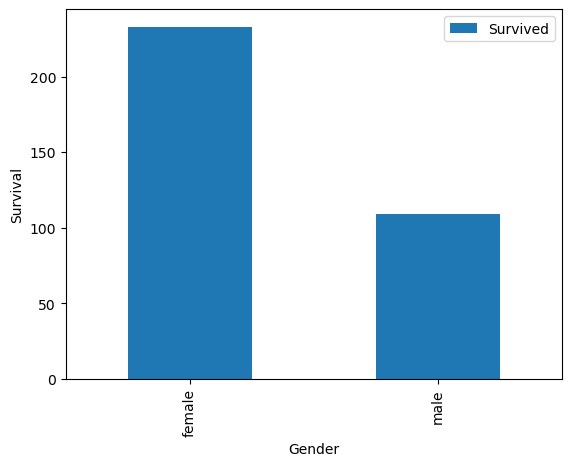

In [211]:
df_bar.plot.bar()
plt.xlabel("Gender")
plt.ylabel("Survival")
plt.show()

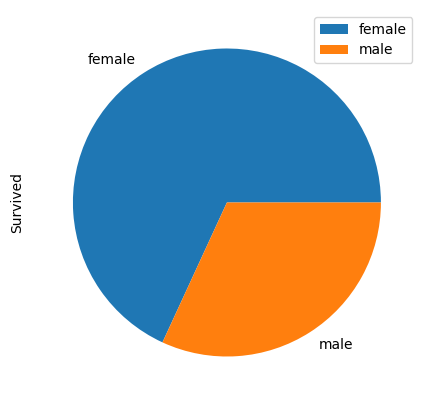

In [215]:
df_bar.plot.pie(y='Survived', figsize=(5, 5))
# plt.xlabel("Gender")
# plt.ylabel("Survival")
plt.show()

### Segregated Categorical & Numerical variables.

In [ ]:
df.dtypes

In [ ]:
### All columns.
all_cols = df.columns.tolist()
all_cols

### categorical columns.
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

### numerical columns.
num_cols = df.select_dtypes(exclude='object').columns.tolist()
num_cols

print("Numerical Columns:", num_cols)
print("Categorical columns:", cat_cols)

In [ ]:
df_numerical_cols = df_numerical.columns.tolist()
df_categorical_cols = df_categorical.columns.tolist()

In [ ]:
cat_col = df.dtypes[df.dtypes == 'O'].index.to_list()
num_col = df.dtypes[~(df.dtypes == 'O')].index.tolist()

In [216]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


### Outlier Treatment.
What is Outlier - Any extremere value in the observations/random sample are called outlier.
Why You need to remove outlier - It can imact the whole population or the predectin power.

In [224]:
Salry = [10,23,14,18,12,65]
np.mean(Salry)

23.666666666666668

#### 1. Using the Boxplot..

C:\Users\gaugupta19\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


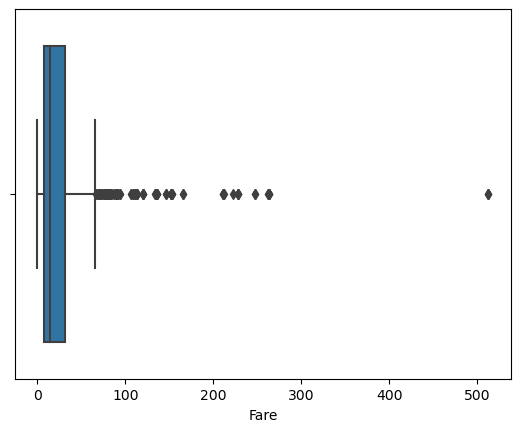

In [220]:
import seaborn as sns
sns.boxplot(df['Fare'])
plt.show()

In [228]:
perc = [.20, .40, .60, .80,.90,.98]
df['Fare'].describe(percentiles=perc)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
20%        7.854200
40%       10.500000
50%       14.454200
60%       21.679200
80%       39.687500
90%       77.958300
98%      211.337500
max      512.329200
Name: Fare, dtype: float64

In [232]:
df[df['Fare']>211].PassengerId.count()

20

In [238]:
q_low = df['Fare'].quantile(0.01)
q_hi  = df['Fare'].quantile(0.99)
df_filtered = df[(df['Fare'] < q_hi) & (df['Fare'] > q_low)]

In [240]:
df_clipped = df.Fare.clip(lower=q_low,upper=q_hi)
df_clipped
# cols = ['value', 'another col']
# dfo[cols] = dfo[cols].clip(upper=100)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

### Using Z-Score

### Using IQR Method.

### Lable Encoding & One Hot Encoding.

### Standarization in Pandas.